
# Project: Investigate the gapminder dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>GAPMINDER  is a Swedish organization that aims to fight devasting ignorance by collecting reliable data about different life indicators, from these indicators  I have chosen three indicators, which are the population index, individual income index, and average age index, which provides information for almost all countries from 1800 to 2100, Through these indicators, I want to find out if what are the country have the most change in average ages and what are the least, and to know the reasons that change the average age of individuals by search on the history of these countries, and I also want to know is there a relationship between per capita income and population.

>To do so for this endeavor, I will analyze a dataset and subsequently give my disclosures about it. I will use the Python libraries NumPy, pandas, and Matplotlib to make my examination easier.
>


In [48]:
# import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime 


%matplotlib inline

In [3]:
#pd options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 180)

<a id='wrangling'></a>
## Data Wrangling


### Load Datasets and Assessing 

In [20]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
def loading_dataset(dataset_name):
     data = pd.read_csv(dataset_name)
     return data

df_population_total = loading_dataset('population_total.csv')
df_median_age_years = loading_dataset('median_age_years.csv')
df_income_per_person_gdppercapita_ppp_inflation_adjusted = loading_dataset('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

## Exploring Data 

In [5]:
print(df_population_total.head())
print(df_median_age_years.head())
print(df_income_per_person_gdppercapita_ppp_inflation_adjusted.head())

       country     1800     1801     1802     1803     1804  ...       2095       2096       2097       2098       2099       2100
0  Afghanistan  3280000  3280000  3280000  3280000  3280000  ...   76000000   75800000   75600000   75400000   75200000   74900000
1      Albania   400000   402000   404000   405000   407000  ...    1220000    1190000    1170000    1140000    1110000    1090000
2      Algeria  2500000  2510000  2520000  2530000  2540000  ...   70700000   70700000   70700000   70700000   70700000   70700000
3      Andorra     2650     2650     2650     2650     2650  ...      62700      62700      62600      62500      62500      62400
4       Angola  1570000  1570000  1570000  1570000  1570000  ...  177000000  179000000  182000000  184000000  186000000  188000000

[5 rows x 302 columns]
               country  1950  1951  1952  1953  1954  ...  2095  2096  2097  2098  2099  2100
0          Afghanistan  19.4   NaN   NaN   NaN   NaN  ...  42.3   NaN   NaN   NaN   NaN  43.4
1 

### Check for shape 


In [6]:
print(df_population_total.shape)
print(df_median_age_years.shape)
print(df_income_per_person_gdppercapita_ppp_inflation_adjusted.shape)

(195, 302)
(184, 152)
(193, 242)


### Check for missing value 

In [7]:
print(df_population_total.isnull().sum(axis=1))
print(df_median_age_years.isnull().sum(axis=1))
print(df_income_per_person_gdppercapita_ppp_inflation_adjusted.isnull().sum(axis=1))

0      0
1      0
2      0
3      0
4      0
      ..
190    0
191    0
192    0
193    0
194    0
Length: 195, dtype: int64
0      120
1      120
2      120
3      120
4      120
      ... 
179    120
180    120
181    120
182    120
183    120
Length: 184, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
188    0
189    0
190    0
191    0
192    0
Length: 193, dtype: int64


### Check for duplicate

In [8]:
print(df_population_total.duplicated('country').sum())
print(df_median_age_years.duplicated('country').sum())
print(df_income_per_person_gdppercapita_ppp_inflation_adjusted.duplicated('country').sum())



0
0
0


### Check for datatype

In [9]:
print(df_population_total.info())
print(df_median_age_years.info())
print(df_income_per_person_gdppercapita_ppp_inflation_adjusted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: int64(301), object(1)
memory usage: 460.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 152 entries, country to 2100
dtypes: float64(151), object(1)
memory usage: 218.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB
None


## Cleaning notes
### Shape is not unifed for all datasets 
### Empty colums in  df_median_age_years dataset

## Cleaning process 


In [10]:
# Take copy of all datasets 

df_population_total_c = df_population_total.copy()
df_median_age_years_c = df_median_age_years.copy()
df_income_per_person_gdppercapita_ppp_inflation_adjusted_c = df_income_per_person_gdppercapita_ppp_inflation_adjusted.copy()

In [11]:
# Remove empty columns in df_median_age_years_c

df_median_age_years_c = df_median_age_years_c.dropna(axis=1, how='all')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
#### What is the most country that has the highest growth in average age from the past to present? and what is lowest change ?

In [51]:
# Get Years function 
###
def convert(date_time): 
    format = '%Y' # The format 
    datetime_str = datetime.datetime.strptime(date_time, format) 
   
    return datetime_str.year
   

In [12]:
# This code is to find the highest\lowest change in avaerage aga  

minmedian = df_median_age_years_c.min(axis=1)
maxmedian = df_median_age_years_c.max(axis=1)
max = 0
min = 1000
maxcountry = "null"
mincountry = 'null'
maxind = 0
minind = 0

for indx in df_median_age_years_c.index:

    g = maxmedian[indx] - minmedian[indx]
    if g > max:
        max = g
        maxcountry = df_median_age_years_c['country'][indx]
        maxind = indx
    if g < min:
        min = g
        mincountry = df_median_age_years_c['country'][indx]
        minind = indx
print(max, maxcountry,maxind)
print(min, mincountry,minind)

41.9 Albania 1
10.5 Luxembourg 96


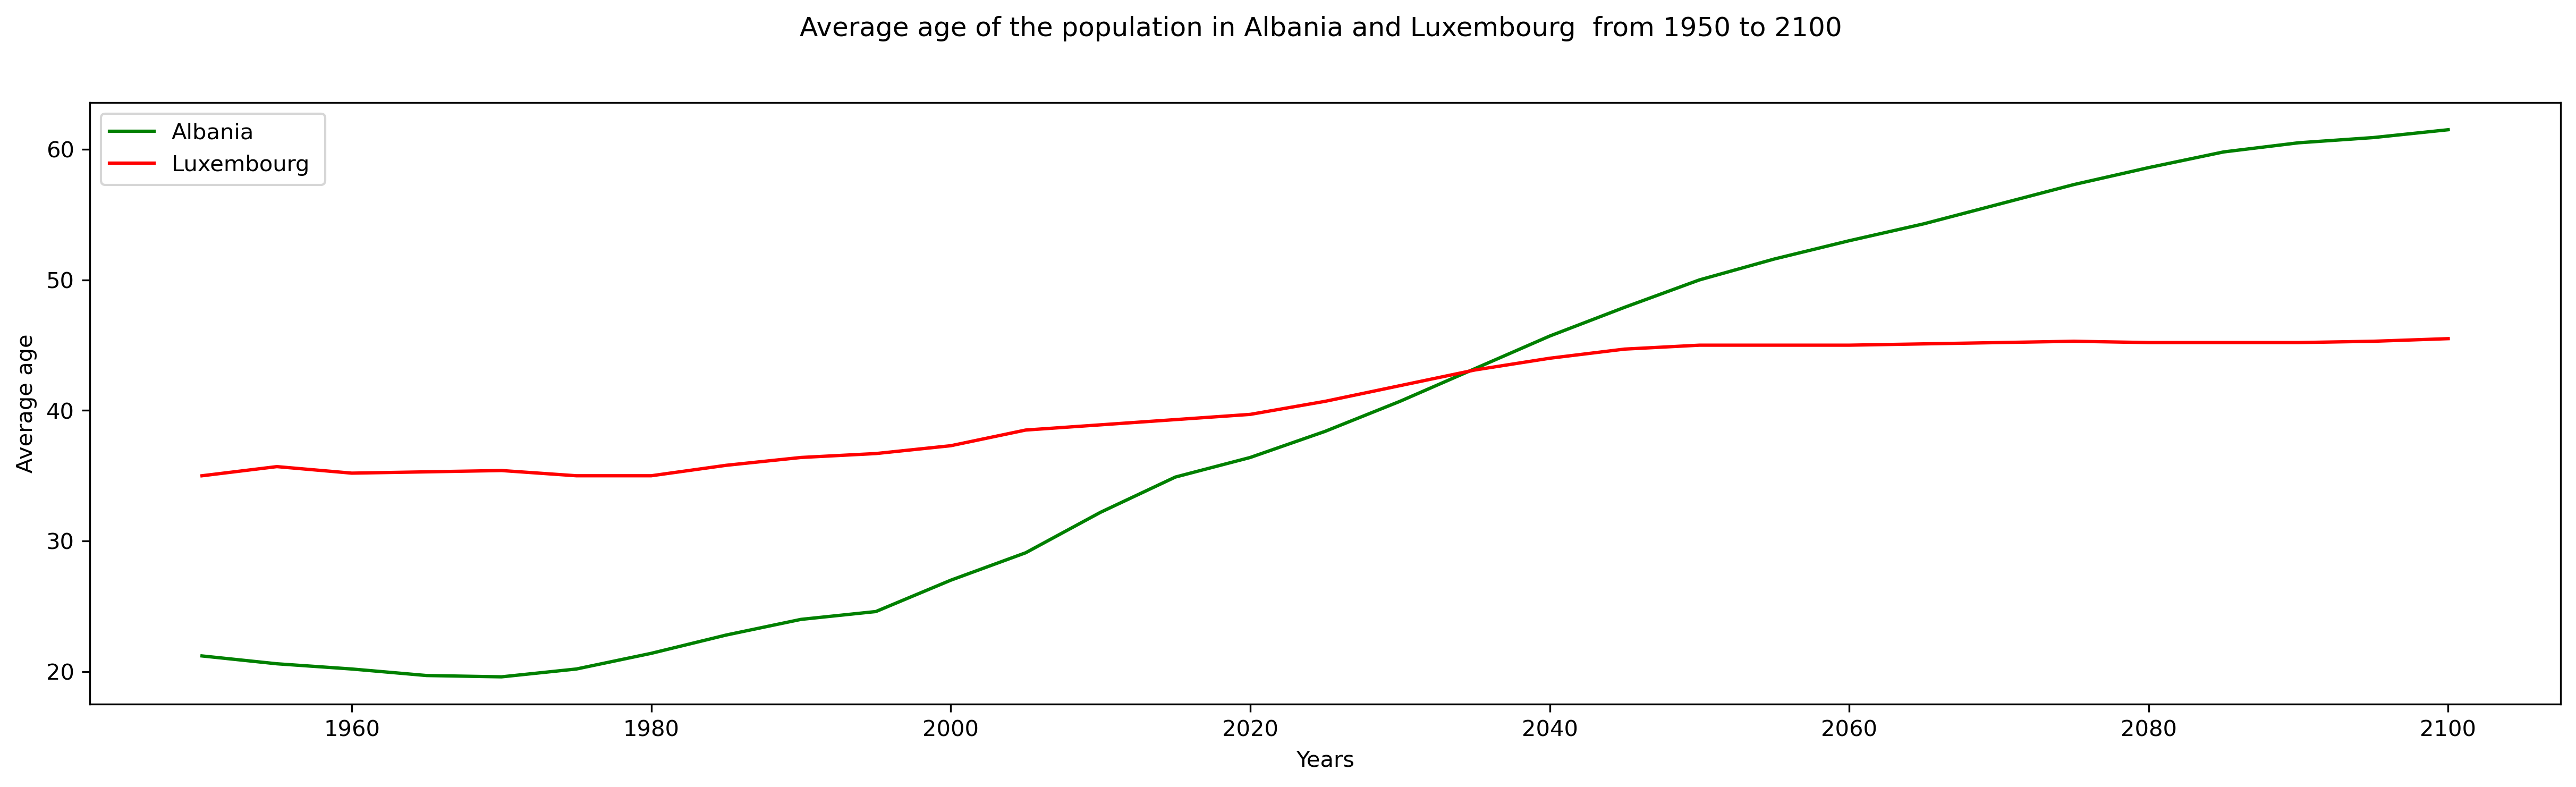

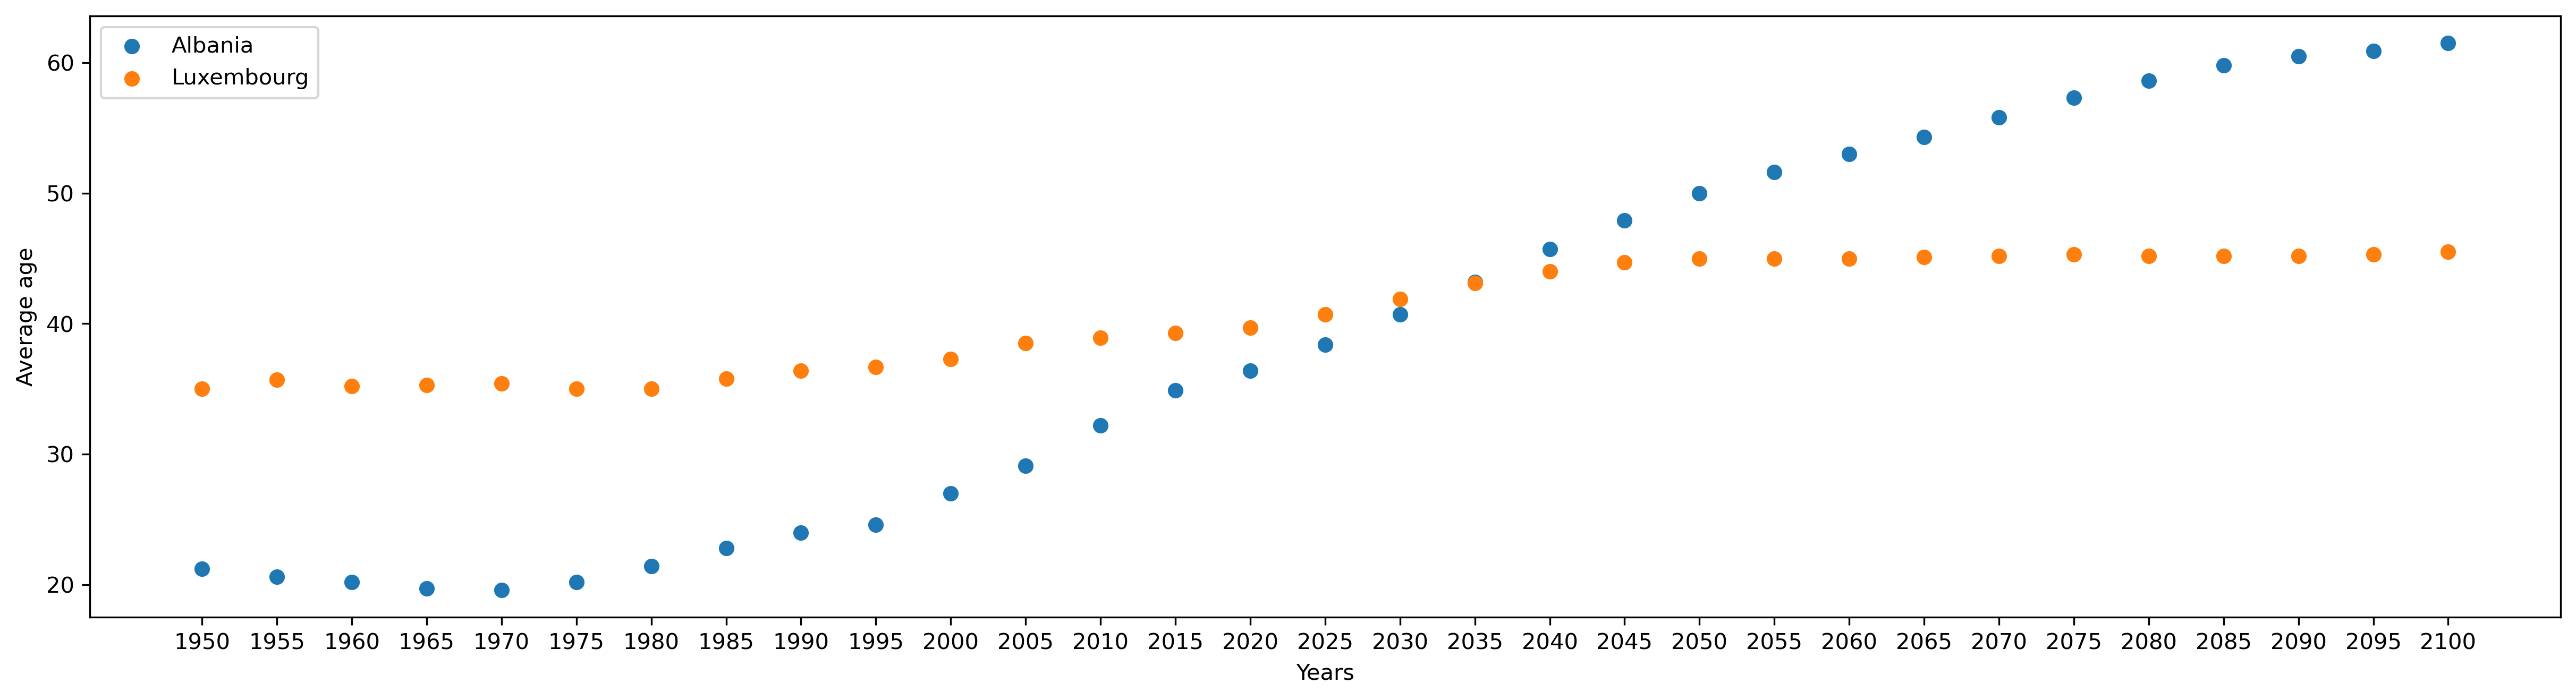

In [52]:
# This code to plot the findings 
years = df_median_age_years_c.columns.tolist()
years = years[1:]
d_year = []
for y in years:
    d_year.append(convert(y))
  
agemx = df_median_age_years_c.iloc[1].tolist()
agemx = agemx[1:]
agemn = df_median_age_years_c.iloc[96].tolist()
agemn = agemn[1:]
plt.figure(figsize=(20,5), dpi=300)
plt.plot(d_year,agemx,'g-',label='Albania')
plt.plot(d_year,agemn,color='r',label='Luxembourg ')


plt.title("Average age of the population in Albania and Luxembourg  from 1950 to 2100 ", pad = 30)
plt.xlabel("Years")
plt.ylabel("Average age")
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(20,5), dpi=300)
plt.scatter(years,agemx,label='Albania')
plt.scatter(years,agemn,label='Luxembourg' )
plt.legend(loc='best')

plt.xlabel("Years")
plt.ylabel("Average age")
plt.show()


#### The above graph shows Albania has the highest change in average age while Luxembourg has the lowest change. 

### Research Question 2
#### Is there a relationship between population increase and per capita income?

In [14]:
# This code is to find the highest\lowest change in population\income  


df_population_total_c 

df_income_per_person_gdppercapita_ppp_inflation_adjusted_c

minValues_population = df_population_total_c.min(axis=1)
maxValues_population = df_population_total_c.max(axis=1)

minValues_income = df_income_per_person_gdppercapita_ppp_inflation_adjusted_c.min(axis=1)
maxValues_income = df_income_per_person_gdppercapita_ppp_inflation_adjusted_c.max(axis=1)


max_p = 0
min_p = 90000000000
maxcountry_p = "null"
mincountry_p = 'null'
maxind_p = 0
minind_p = 0

max_i = 0
min_i = 90000000
maxcountry_i = "null"
mincountry_i = 'null'
maxind_i = 0
minind_i = 0

for indx in df_population_total_c.index:

    g = maxValues_population[indx] - minValues_population[indx]
    if g > max_p:
        max_p = g
        maxcountry_p = df_median_age_years_c['country'][indx]
        maxind_p = indx
    if g < min_p:
        min_p = g
        mincountry_p = df_median_age_years_c['country'][indx]
        minind_p = indx
print(max_p, maxcountry_p,maxind_p)
print(min_p, mincountry_p,minind_p)


for indx in df_income_per_person_gdppercapita_ppp_inflation_adjusted_c.index:

    g = maxValues_income[indx] - minValues_income[indx]
    if g > max_i:
        max_i = g
        maxcountry_i = df_income_per_person_gdppercapita_ppp_inflation_adjusted_c['country'][indx]
        maxind_i = indx
    if g < min_i:
        min_i = g
        mincountry_i = df_income_per_person_gdppercapita_ppp_inflation_adjusted_c['country'][indx]
        minind_i = indx
print(max_i, maxcountry_i,maxind_i)
print(min_i, mincountry_i,minind_i)

1449000000 Iraq 77
267 Iceland 73
178002 United Arab Emirates 182
632 Burundi 27


#### The below graph shows the relation between highest\lowest change in populations when compare this with the upcoming graph for income then we can get the findings

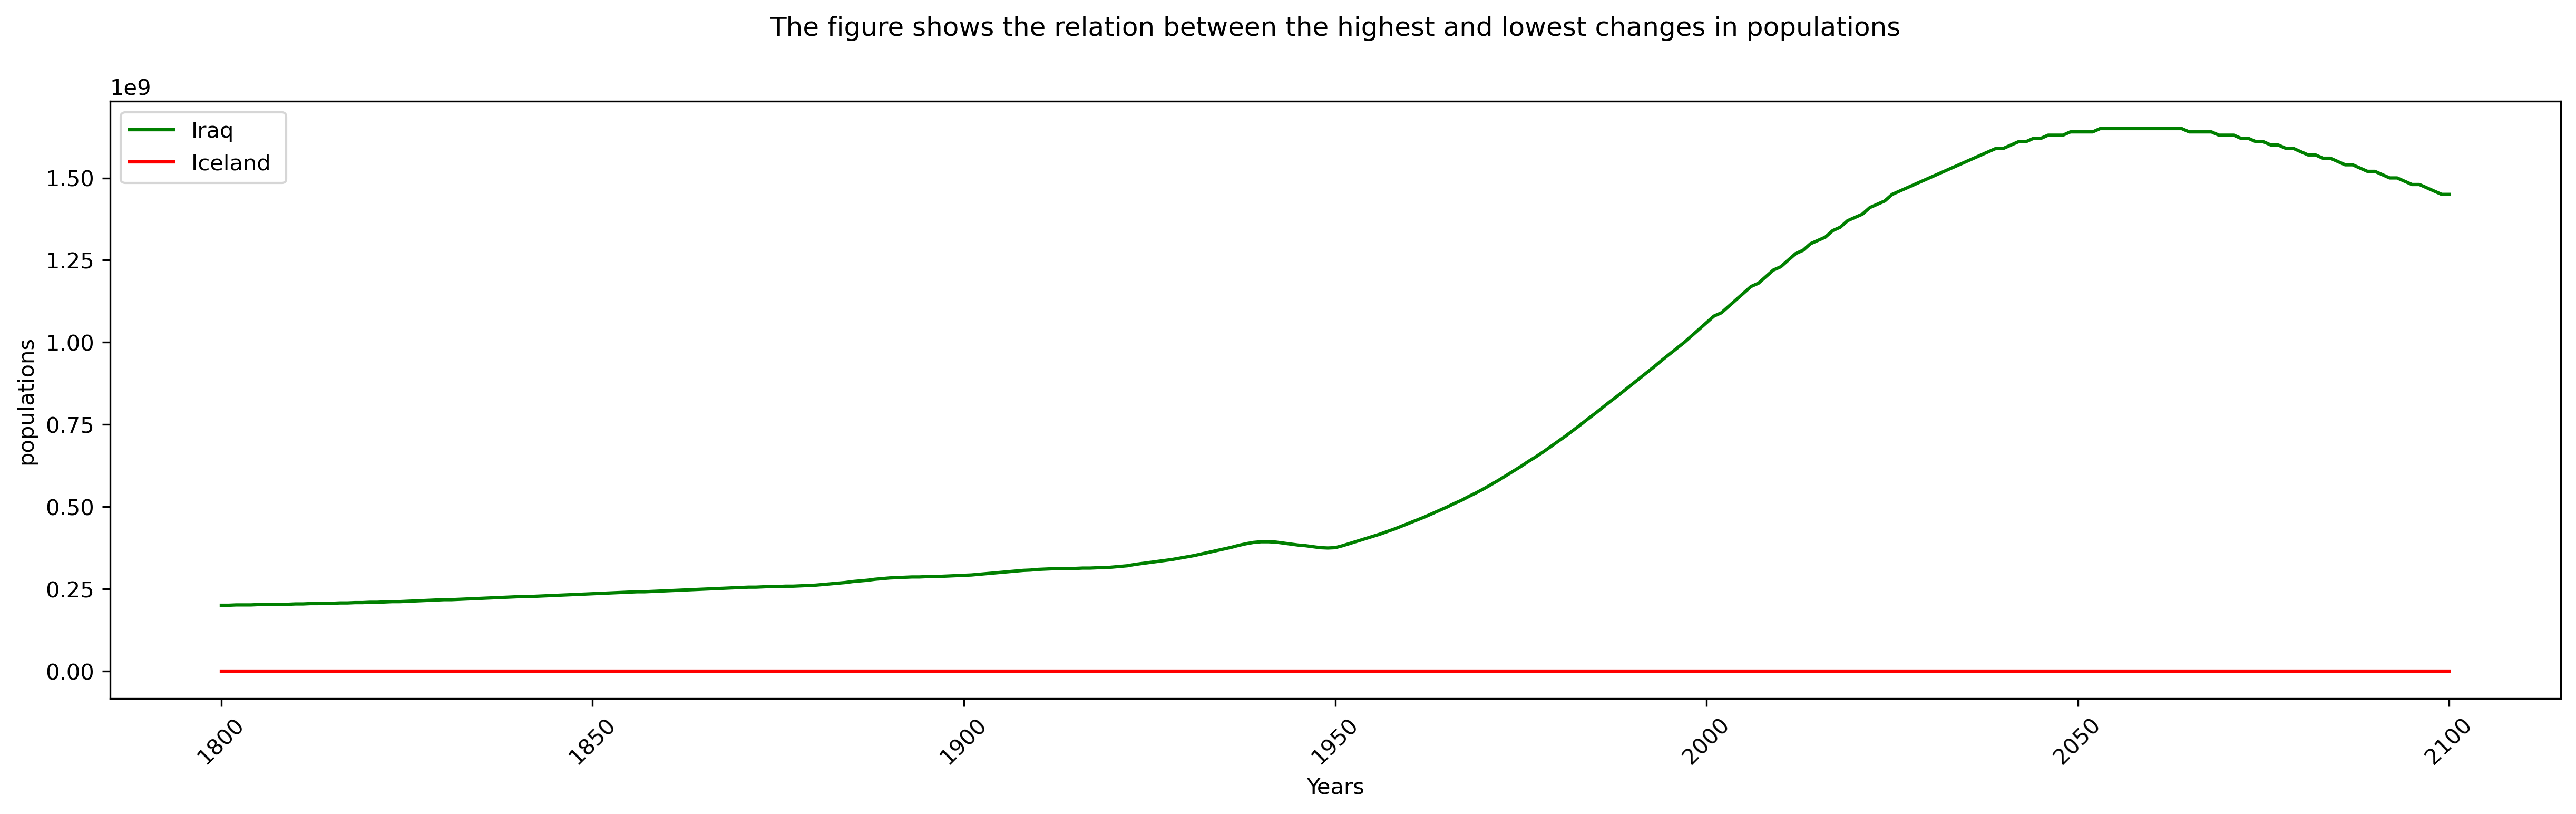

In [53]:
# This code to plot the relation between highest\lowest change in populations

years = df_population_total_c.columns.tolist()

years = years[1:]
d_year = []
for y in years:
    d_year.append(convert(y))


population_hg = df_population_total_c.iloc[77].tolist()
population_hg = population_hg[1:]
population_lg = df_population_total_c.iloc[73].tolist()
population_lg = population_lg[1:]
plt.figure(figsize=(20,5), dpi=300)
plt.plot(d_year,population_hg,'g-',label='Iraq')
plt.plot(d_year,population_lg,color='r',label='Iceland ')

plt.title("The figure shows the relation between the highest and lowest changes in populations", pad = 30)
plt.xlabel("Years")
plt.ylabel("populations")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

#### The below graph shows the relation between highest\lowest change in income when except to see the same countries in this graph however it looks link there no relation between populations and income, we will discuss with more details in the results section.

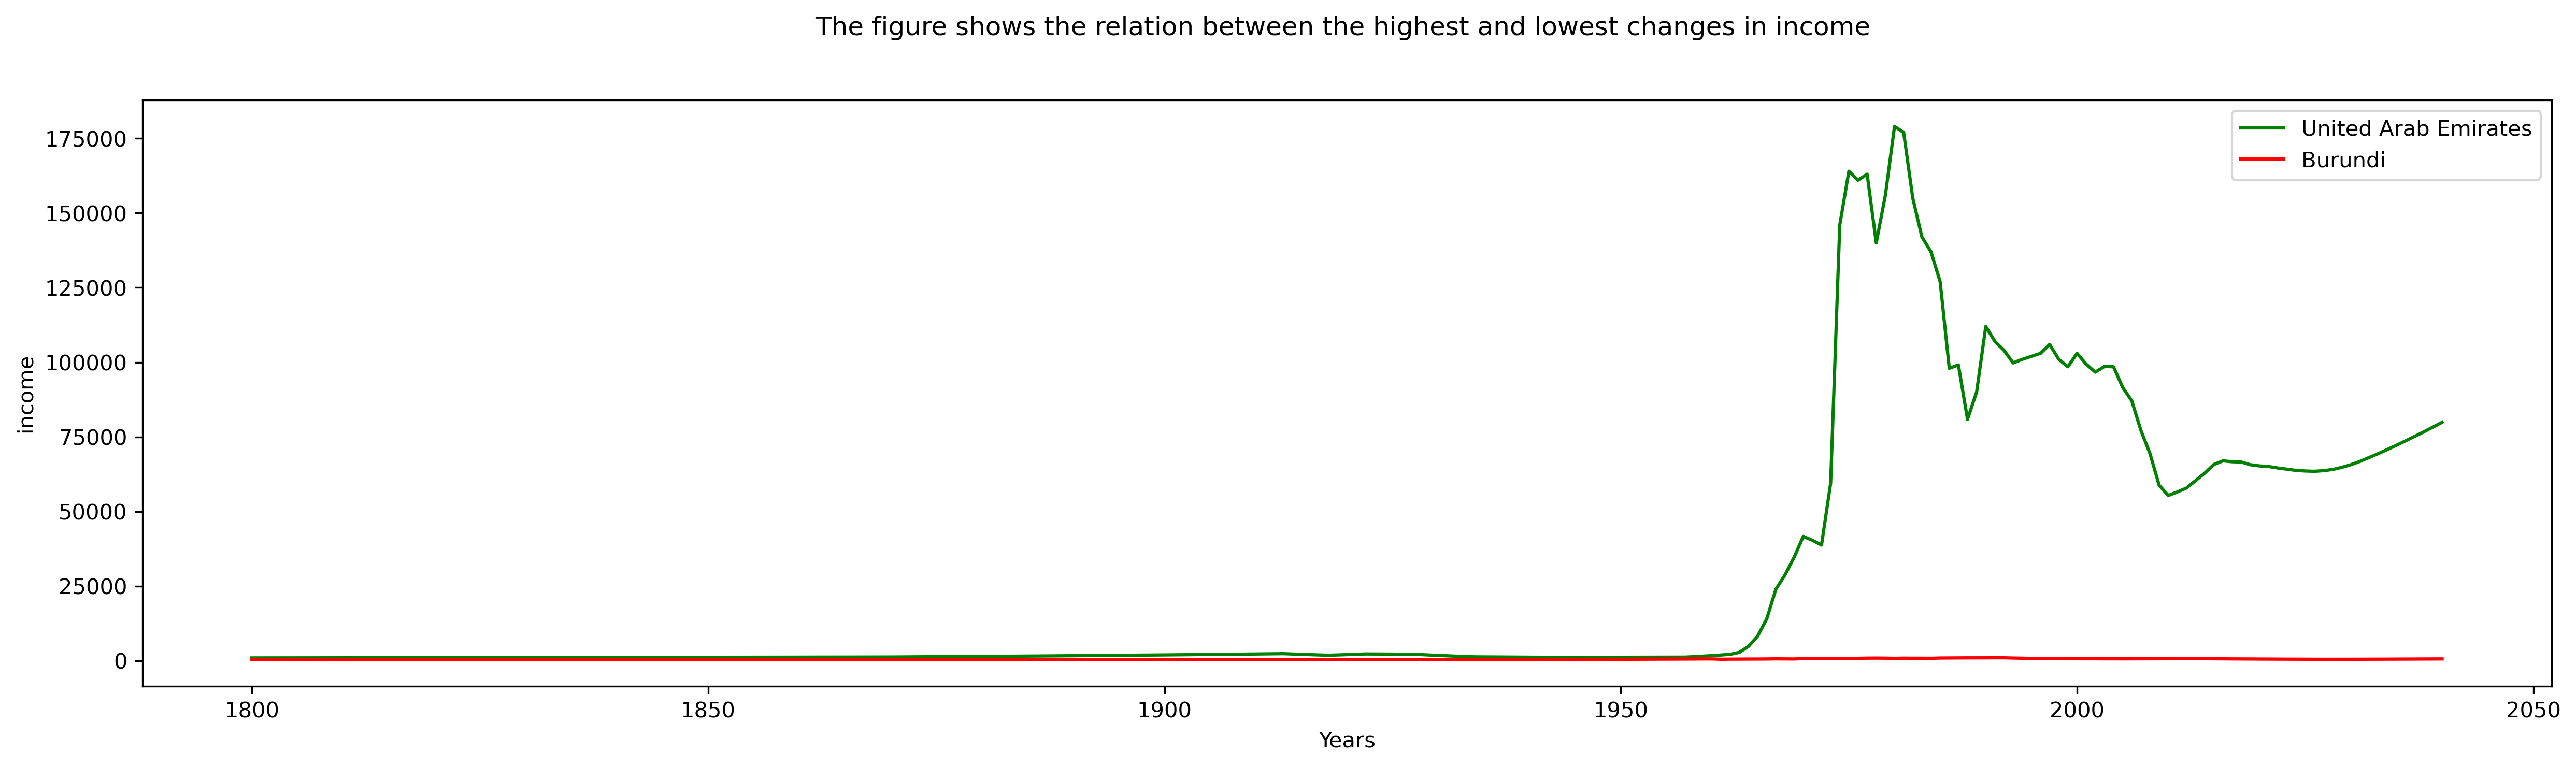

In [55]:
# This code to plot the relation between highest\lowest change in income

years = df_income_per_person_gdppercapita_ppp_inflation_adjusted_c.columns.tolist()

years = years[1:]
d_year = []
for y in years:
    d_year.append(convert(y))
income_hg = df_income_per_person_gdppercapita_ppp_inflation_adjusted_c.iloc[182].tolist()
income_hg = income_hg[1:]
income_lg = df_income_per_person_gdppercapita_ppp_inflation_adjusted_c.iloc[27].tolist()
income_lg = income_lg[1:]
plt.figure(figsize=(20,5), dpi=300)
plt.plot(d_year,income_hg,'g-',label='United Arab Emirates')
plt.plot(d_year,income_lg,color='r',label='Burundi  ')

plt.title("The figure shows the relation between the highest and lowest changes in income ", pad = 30)
plt.xlabel("Years")
plt.ylabel("income")
plt.legend(loc='best')
plt.show()

<a id='conclusions'></a>
## Conclusions

### Results

#### In this report, we will answer two questions, the first of which is which country has the most change in the average age of its population and which country has the least change in the average age of its population. Through the first drawing, it becomes clear that the country of Albania is the most changed, as the difference reached 40 years, and we find that the state of Luxembourg  is the lowest, as the difference reached 10 years, and this requires us to research the history of each country to find out the factors leading to this and the direct and indirect causes.

#### In answer to the second question, I made a graph of the countries with the most change in population and the least change in the number of population. also I made a graph of the countries with the most change in the rate of income and the least in the change in the rate of income. Through the two figures, it is not clear that there is a direct relationship between the increase in population and The increase in the level of income, and of course there are many factors that control the level of per capita income. 

### Limitation

#### The most important thing is that we do not know how this data was collected and how true it is, so we cannot be sure of the results.

